In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import pandas as pd


In [5]:
os.chdir('/dfs7/swaruplab/smorabit/analysis/ADDS_2021/visium/human/')
data_dir = 'data/'
fig_dir = 'figures/'

# load the sub-clustersd
#adata_sc = sc.read_h5ad('/dfs7/swaruplab/smorabit/analysis/ADDS_2021/splitseq/integration/data/ADDS_subclusters_final.h5ad')


In [6]:
#type(adata_sc.X)

In [7]:
# load counts matrix
X = io.mmread('data/ADDS_seurat_processed_counts.mtx')


In [8]:
X = coo_matrix.tocsc(X)

In [9]:
X = csc_matrix.transpose(X)

In [10]:
# load the metadata
obs = pd.read_csv('data/ADDS_seurat_processed_meta.tsv', sep='\t')
obs.head()

/tmp/smorabit/25517278/ipykernel_839596/3901523838.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  obs = pd.read_csv('data/ADDS_seurat_processed_meta.tsv', sep='\t')


,orig.ident,nCount_Spatial,nFeature_Spatial,SampleID,Case.Year,Case.Num,Diagnosis,Sex,Age,CaptureArea,...,bs.q10,annotation,combined_id,ASC_deconv,EX_deconv,INH_deconv,MG_deconv,ODC_deconv,OPC_deconv,VASC_deconv
AAACAAGTATCTCCCA-1_1_1,SeuratProject,547,291,1,1999,2,Control,F,74,A1,...,1,WM3,Oct_2021_1-Control-F-74,0.083822,0.000000,0.000000,0.000000,0.587188,0.083801,0.124197
AAACAATCTACTAGCA-1_1_1,SeuratProject,242,155,1,1999,2,Control,F,74,A1,...,9,L1,Oct_2021_1-Control-F-74,0.168162,0.121411,0.000000,0.000000,0.000000,0.304117,0.332177
AAACAGAGCGACTCCT-1_1_1,SeuratProject,1602,816,1,1999,2,Control,F,74,A1,...,1,WM3,Oct_2021_1-Control-F-74,0.240503,0.000000,0.089614,0.109211,0.388216,0.000000,0.157659
AAACATTTCCCGGATT-1_1_1,SeuratProject,1025,599,1,1999,2,Control,F,74,A1,...,2,L5/6,Oct_2021_1-Control-F-74,0.207492,0.235994,0.142451,0.000000,0.111100,0.136842,0.114173
AAACCACTACACAGAT-1_1_1,SeuratProject,283,158,1,1999,2,Control,F,74,A1,...,9,L1,Oct_2021_1-Control-F-74,0.134279,0.171159,0.000000,0.090744,0.393148,0.095459,0.099503


In [9]:
obs.columns

Index(['orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'SampleID',
       'Case.Year', 'Case.Num', 'Diagnosis', 'Sex', 'Age', 'CaptureArea',
       'Slide', 'Sectioning', 'LibraryDay1', 'LibraryDay2', 'INDEX',
       'seqbatch', 'Sample', 'Spatial_snn_res.1', 'seurat_clusters',
       'log_nCount_Spatial', 'bs.q15', 'row', 'col', 'imagerow', 'imagecol',
       'bs.q7', 'bs.q5', 'bs.q6', 'bs.q8', 'bs.q9', 'bs.q10', 'annotation',
       'combined_id', 'ASC_deconv', 'EX_deconv', 'INH_deconv', 'MG_deconv',
       'ODC_deconv', 'OPC_deconv', 'VASC_deconv'],
      dtype='object')

In [11]:
columns = ['nCount_Spatial', 'Sample', 'Diagnosis', 'Sex', 'Age', 'seqbatch', 'annotation']

In [12]:
obs[columns]

,nCount_Spatial,Sample,Diagnosis,Sex,Age,seqbatch,annotation
AAACAAGTATCTCCCA-1_1_1,547,Oct_2021_1,Control,F,74,Oct_2021,WM3
AAACAATCTACTAGCA-1_1_1,242,Oct_2021_1,Control,F,74,Oct_2021,L1
AAACAGAGCGACTCCT-1_1_1,1602,Oct_2021_1,Control,F,74,Oct_2021,WM3
AAACATTTCCCGGATT-1_1_1,1025,Oct_2021_1,Control,F,74,Oct_2021,L5/6
AAACCACTACACAGAT-1_1_1,283,Oct_2021_1,Control,F,74,Oct_2021,L1
...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1_7_4,2122,Dec_20_2021_Human8,Control,F,64,Dec_20_2021,L1
TTGTTTCATTAGTCTA-1_7_4,2346,Dec_20_2021_Human8,Control,F,64,Dec_20_2021,L1
TTGTTTCCATACAACT-1_7_4,2064,Dec_20_2021_Human8,Control,F,64,Dec_20_2021,L3/4
TTGTTTGTATTACACG-1_7_4,3602,Dec_20_2021_Human8,Control,F,64,Dec_20_2021,L3/4


In [13]:
var = pd.read_csv('/dfs7/swaruplab/smorabit/data/ADDS_2021/visium/Dec_13_2021/spaceranger_count/Human1/outs/filtered_feature_bc_matrix/features.tsv.gz', sep='\t', header=None)
var.columns = ['ensembl', 'gene_symbol', 'type']
var.index = var.gene_symbol.to_list()
var.head()


,ensembl,gene_symbol,type
MIR1302-2HG,ENSG00000243485,MIR1302-2HG,Gene Expression
FAM138A,ENSG00000237613,FAM138A,Gene Expression
OR4F5,ENSG00000186092,OR4F5,Gene Expression
AL627309.1,ENSG00000238009,AL627309.1,Gene Expression
AL627309.3,ENSG00000239945,AL627309.3,Gene Expression


In [21]:
# make adata object
adata = anndata.AnnData(X=X, obs=obs[columns], var=var)
adata.var_names_make_unique()

/pub/smorabit/miniconda3/envs/scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [22]:
adata.shape

(115451, 36601)

In [23]:
# pre-processing
adata.layers["counts"] = adata.X.copy() # preserve counts


In [24]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata 

In [25]:
# save the dataset for scDRS:
adata.write_h5ad('{}ADDS_visium_scDRS.h5ad'.format(data_dir))

In [26]:
# write the covariate table:
df_cov = adata.obs[['nCount_Spatial']]
df_cov.index = df_cov.index.rename('cell_id')
df_cov.to_csv('{}ADDS_visium_scDRS_cov.tsv'.format(data_dir), sep='\t')

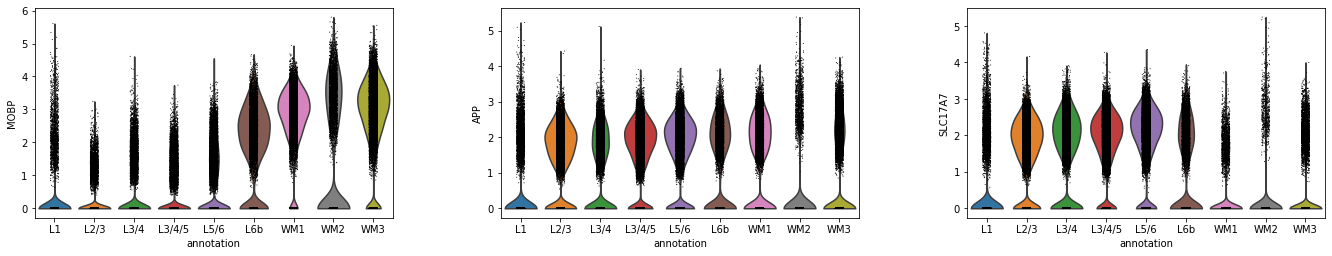

In [20]:
sc.pl.violin(adata, keys=['MOBP', 'APP', 'SLC17A7'], groupby='annotation')

In [86]:
adata.write('data/ADDS_seurat_processed.h5ad')

# Split between the different samples

In [23]:
samples = adata.obs.Sample.unique().to_list()

for cur_sample in samples:
    print(cur_sample)
    cur_adata = adata[adata.obs.Sample == cur_sample].copy() 
    cur_adata.write('data/sample_h5ad/{}.h5ad'.format(cur_sample))


Oct_2021_1
Oct_2021_2
Oct_2021_3
Oct_2021_4
Oct_2021_5
Oct_2021_6
Oct_2021_7
Oct_2021_8
Nov_24_2021_VisiumHuman_1
Nov_24_2021_VisiumHuman_10
Nov_24_2021_VisiumHuman_11
Nov_24_2021_VisiumHuman_12
Nov_24_2021_VisiumHuman_13
Nov_24_2021_VisiumHuman_14
Nov_24_2021_VisiumHuman_15
Nov_24_2021_VisiumHuman_16
Nov_24_2021_VisiumHuman_2
Nov_24_2021_VisiumHuman_3
Nov_24_2021_VisiumHuman_4
Nov_24_2021_VisiumHuman_5
Nov_24_2021_VisiumHuman_6
Nov_24_2021_VisiumHuman_7
Nov_24_2021_VisiumHuman_8
Nov_24_2021_VisiumHuman_9
Dec_13_2021_Human1
Dec_13_2021_Human2
Dec_13_2021_Human3
Dec_13_2021_Human4
Dec_13_2021_Human5
Dec_13_2021_Human6
Dec_13_2021_Human7
Dec_13_2021_Human8
Dec_20_2021_Human1
Dec_20_2021_Human2
Dec_20_2021_Human3
Dec_20_2021_Human4
Dec_20_2021_Human5
Dec_20_2021_Human7
Dec_20_2021_Human8
